Só verificando se o tensorflow reconheceu a GPU (passei perrengue pra habilitar o CUDA na minha GPU)

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.10.0
Num GPUs Available:  1


Carregar imagens do diretório

In [2]:
import os
diretorio = os.path.abspath(os.getcwd())

Carregando base de dados a partir dos diretórios de treino, validação e teste

In [3]:
folder = "\\cats_and_dogs_dataset"
train_folder = diretorio + folder + "\\train"
val_folder = diretorio + folder + "\\validation"
test_folder = diretorio + folder + "\\test"

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory #função do keras que cria datasets de imagem a partir de diretórios

#Criando os datasets respectivamente de treino, validação e teste.
#Redimensiona as imagens para ficar padronizado e o define o tamanho de cada lote com 32 imagens. 

train_dataset = image_dataset_from_directory(train_folder, image_size = (180, 180), batch_size = 32)

validation_dataset = image_dataset_from_directory(val_folder, image_size = (180, 180), batch_size = 32)

test_dataset = image_dataset_from_directory(test_folder, image_size = (180, 180), batch_size = 32)

Found 17485 files belonging to 2 classes.
Found 2497 files belonging to 2 classes.
Found 5018 files belonging to 2 classes.


Treinando a rede

In [5]:
from tensorflow import keras # Importa o Keras, que é usado para criar a rede neural.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling # Importa as camadas que serão usadas.

model = keras.Sequential() # Cria o modelo SEQUENCIAL, que até então está vazio.
model.add(Rescaling(scale = 1.0/255)) # Adiciona uma camada de normalização, que representa os pixels das imagens em valores entre 0 e 1.
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu')) # Primeira camada de convolução com 32 filtros, usa a função de ativação ReLU para detectar características nas imagens.
model.add(MaxPooling2D(pool_size = (2, 2))) # Primeira camada de pooling, reduz a dimensionalidade das características detectadas pela camada de convolução.
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu')) # Segunda camada de convolução com 64 filtros.
model.add(MaxPooling2D(pool_size = (2, 2))) # Segunda camada de pooling.
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu')) # Terceira camada de convolução com 128 filtros.
model.add(Flatten()) # Achata a saída da última camada de convolução em um vetor.
model.add(Dense(1, activation = 'sigmoid')) # Adiciona uma camada densa com um neurônio e função de ativação sigmoid para classificação binária (gato ou cachorro).

# Compila o modelo, especificando a função de perda, o otimizador e as métricas de avaliação.
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [
    ModelCheckpoint(filepath = "trained_model.keras", save_best_only = True, monitor = "val_loss")
]

history = model.fit(train_dataset, epochs = 30, validation_data = validation_dataset, callbacks = callbacks)

Epoch 1/30
547/547 [==============================] - 33s 45ms/step - loss: 0.6897 - accuracy: 0.5624 - val_loss: 0.6634 - val_accuracy: 0.5995
Epoch 2/30
547/547 [==============================] - 24s 43ms/step - loss: 0.5725 - accuracy: 0.7016 - val_loss: 0.5187 - val_accuracy: 0.7377
Epoch 3/30
547/547 [==============================] - 24s 44ms/step - loss: 0.4746 - accuracy: 0.7731 - val_loss: 0.4944 - val_accuracy: 0.7709
Epoch 4/30
547/547 [==============================] - 24s 44ms/step - loss: 0.3976 - accuracy: 0.8185 - val_loss: 0.5812 - val_accuracy: 0.7553
Epoch 5/30
547/547 [==============================] - 25s 45ms/step - loss: 0.3123 - accuracy: 0.8639 - val_loss: 0.6539 - val_accuracy: 0.7533
Epoch 6/30
547/547 [==============================] - 25s 45ms/step - loss: 0.2207 - accuracy: 0.9088 - val_loss: 0.7565 - val_accuracy: 0.7757
Epoch 7/30
547/547 [==============================] - 25s 45ms/step - loss: 0.1478 - accuracy: 0.9410 - val_loss: 0.9392 - val_accuracy:

Visualização de Resultados

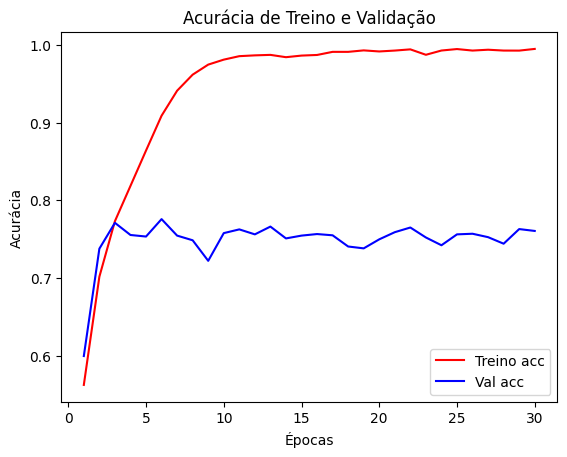

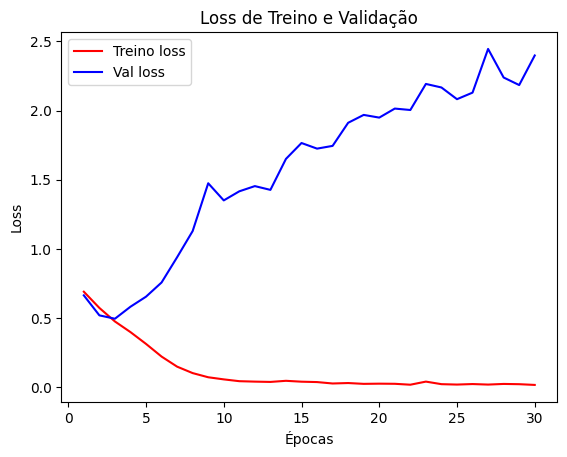

In [7]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plot da Acurácia
plt.plot(epochs, accuracy, "r", label = "Treino acc")
plt.plot(epochs, val_accuracy, "b", label = "Val acc")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.title("Acurácia de Treino e Validação")
plt.legend()

plt.figure()

# Plot do Loss
plt.plot(epochs, loss, "r", label = "Treino loss")
plt.plot(epochs, val_loss, "b", label = "Val loss")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.title("Loss de Treino e Validação")
plt.legend()

plt.show()


Resultados do Conjunto de Teste

In [8]:
from tensorflow import keras
model = keras.models.load_model("trained_model.keras")

In [9]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

157/157 [==============================] - 4s 23ms/step - loss: 0.4972 - accuracy: 0.7704
Test accuracy: 0.770


Predição Imagem individual

In [10]:
import matplotlib.pyplot as plt

def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize = size)

    axis.imshow(img, 'gray')
    axis.set_title(title, fontdict = {'fontsize': 20, 'fontweight': 'medium'})
    plt.show()

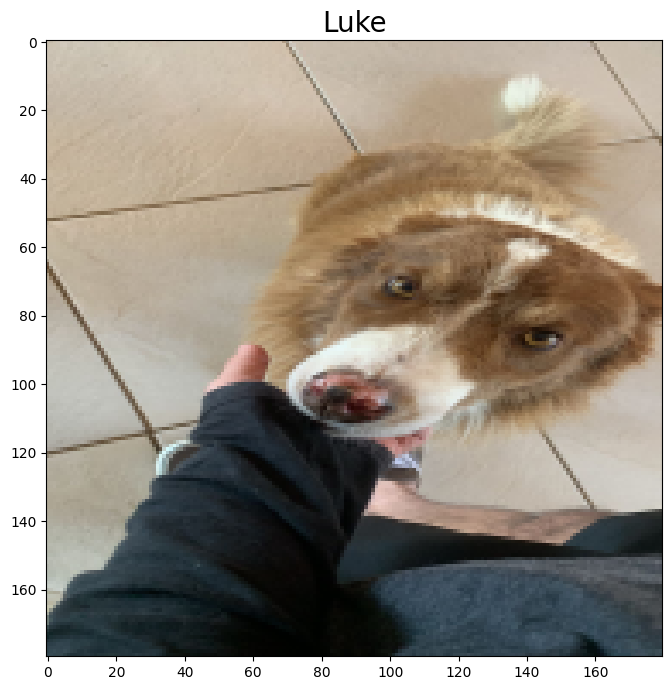

In [11]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread("luke.jpeg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
Luke_img = cv2.resize(test_img, (180, 180), interpolation = cv2.INTER_AREA)

showSingleImage(Luke_img, "Luke", (12, 8))

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Carrega o modelo treinado
model = load_model('trained_model.keras')

# Carrega e processa a imagem
test_img = image.load_img("luke.jpeg", target_size=(180, 180))
x = image.img_to_array(test_img)
x = np.expand_dims(x, axis=0)

# Faz a previsão usando o modelo
pred = (model.predict(x) > 0.5).astype('int32')[0][0]

if pred == 1:
    print("Cachorro")
else:
    print("Gato")
    
# Imprime o resultado da previsão
print(model.predict(x))


1/1 [==============================] - 0s 108ms/step
Cachorro
1/1 [==============================] - 0s 21ms/step
[[0.61473215]]
